# Random Forest Classification

In this exercise we will be tuning the RandomForest hyperparameters

Satrt by Importing useful libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data which is included in the 'data_banknote_authentication.csv' file

In [11]:
df = pd.read_csv(r"/content/data_banknote_authentication.csv")

Diving the data into features and labels (X and y)

In [12]:
X = df.drop('Class',axis=1)
y = df['Class']

Splitting the data into train and test parts

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Use the RandomForest model with a GridSearch to optimize 'n_estimators',

*   List item
*   List item

'max_features' and 'criterion' parameters

In [19]:

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier


# Define the RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)

n_estimators_values = [10,20,21,22,23,24,25,26,27,28,29,30,40, 50]

# Define the parameter grid
param_grid = {
    'n_estimators': [10,20,21,22,23,24,25,26,27,28,29,30,40,50],  # Number of trees
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

# Perform GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Train the model with the best parameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)




Best Parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 21}
Best Accuracy: 0.996875


Evaluate the model by displaying a confusion matrix and a classification report

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



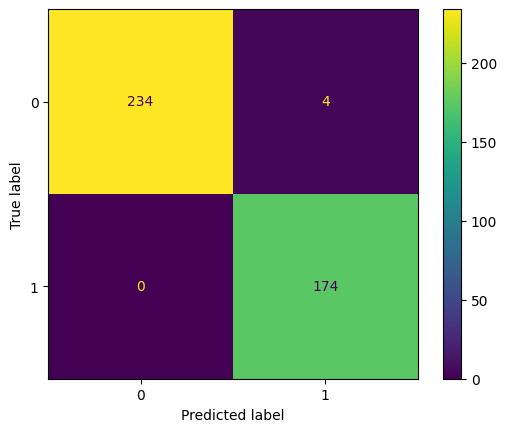

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Print Classification Report
print(classification_report(y_test, y_pred))


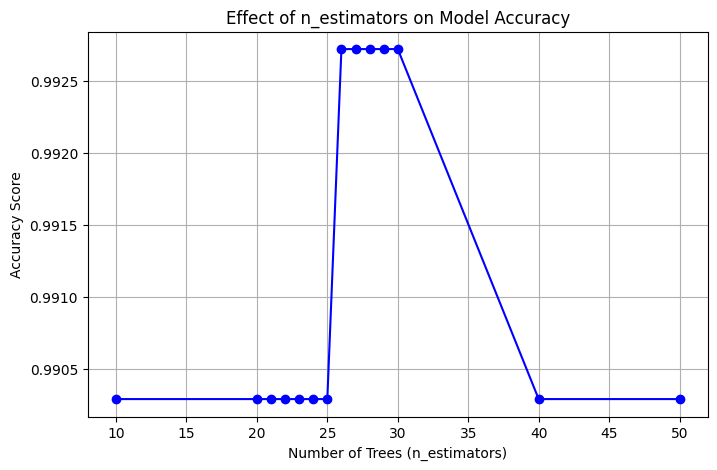